## Assignment 3 <br>
CORRELATION AND COVARIANCE:<br>
1. Find the correlation matrix on the iris dataset.
2. Plot the correlation plot on the dataset and visualize giving an overview of relationships
among data on iris dataset

### Dataset - Single elder home monitoring: Gas and position<br>
This dataset contains gas and temperature sensors as well as movement infra-red sensors from the monitoring of an elder person living alone in their own home from 2019-11-06 to 2020-02-13. The measurings have a temporal resolution of 20 seconds. The air and gas sensors measure temperature, humidity, CO2, CO and MOX readings. The data from the position sensors are binary; for each room, a 1 means that movement has been detected in that room while a 0 means that the sensor has gone back to baseline. The attached figure represents a simple layout of the monitored home as well as the sensors locations. The dataset also includes 19 days of measurements (from 2020-01-25 to 2020-02-13) where noone was occupying the room (except for an esporadic visit the 2020-01-29 at 15:), as reference data

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/sensorDataset.csv')
df.head()

,timestamp,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue
0,2020-01-25 00:01:49.251503+01:00,20.64,55.57,121.0,496.0,521.0,694.0,652.0,591.0,135.0
1,2020-01-25 00:02:09.350082+01:00,20.64,55.53,122.0,495.0,521.0,694.0,652.0,591.0,135.0
2,2020-01-25 00:02:29.319505+01:00,20.62,55.53,121.0,495.0,522.0,694.0,651.0,591.0,135.0
3,2020-01-25 00:02:49.399379+01:00,20.62,55.57,121.0,495.0,522.0,694.0,651.0,591.0,135.0
4,2020-01-25 00:03:09.158989+01:00,20.62,55.59,121.0,495.0,522.0,694.0,652.0,591.0,135.0


In [5]:
df.shape

(75511, 10)

In [24]:
df.isnull().sum()

temperature      0
humidity         0
CO2CosIRValue    0
CO2MG811Value    0
MOX1             0
MOX2             0
MOX3             0
MOX4             0
COValue          0
dtype: int64

In [6]:
df.info

<bound method DataFrame.info of                               timestamp  temperature  humidity  CO2CosIRValue  \
0      2020-01-25 00:01:49.251503+01:00        20.64     55.57          121.0   
1      2020-01-25 00:02:09.350082+01:00        20.64     55.53          122.0   
2      2020-01-25 00:02:29.319505+01:00        20.62     55.53          121.0   
3      2020-01-25 00:02:49.399379+01:00        20.62     55.57          121.0   
4      2020-01-25 00:03:09.158989+01:00        20.62     55.59          121.0   
...                                 ...          ...       ...            ...   
75506  2020-02-13 11:56:53.929978+01:00        20.62     57.75           62.0   
75507  2020-02-13 11:57:14.204458+01:00        20.62     57.75           62.0   
75508  2020-02-13 11:57:33.983249+01:00        20.62     57.75           62.0   
75509  2020-02-13 11:57:54.058349+01:00        20.62     57.74           63.0   
75510  2020-02-13 11:58:14.014336+01:00        20.62     57.74           63.0

In [7]:
df.describe()

,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue
count,75511.000000,75511.000000,75511.000000,75511.000000,75511.00000,75511.000000,75511.000000,75511.000000,75511.000000
mean,20.025767,56.690943,70.176226,510.003523,538.73139,724.035849,675.748619,625.210473,114.237290
std,1.404978,2.416317,22.969229,9.233296,21.36482,19.940654,22.754632,27.964882,21.903941
min,14.820000,46.270000,37.000000,420.000000,339.00000,634.000000,575.000000,473.000000,82.000000
25%,19.940000,55.360000,53.000000,502.000000,530.00000,710.000000,663.000000,611.000000,101.000000
50%,20.230000,57.030000,69.000000,509.000000,537.00000,722.000000,676.000000,626.000000,109.000000
75%,20.640000,58.310000,74.000000,518.000000,545.00000,742.000000,690.000000,643.000000,120.000000
max,23.470000,69.260000,198.000000,526.000000,598.00000,791.000000,734.000000,690.000000,918.000000


In [8]:
df['temperature'] = (df['temperature'] > 18).astype(int)

In [9]:
df.head()

,timestamp,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue
0,2020-01-25 00:01:49.251503+01:00,1,55.57,121.0,496.0,521.0,694.0,652.0,591.0,135.0
1,2020-01-25 00:02:09.350082+01:00,1,55.53,122.0,495.0,521.0,694.0,652.0,591.0,135.0
2,2020-01-25 00:02:29.319505+01:00,1,55.53,121.0,495.0,522.0,694.0,651.0,591.0,135.0
3,2020-01-25 00:02:49.399379+01:00,1,55.57,121.0,495.0,522.0,694.0,651.0,591.0,135.0
4,2020-01-25 00:03:09.158989+01:00,1,55.59,121.0,495.0,522.0,694.0,652.0,591.0,135.0


In [10]:
df['temperature'].unique()

array([1, 0])

In [11]:
matrix = np.corrcoef(df['humidity'], df['MOX1'])
matrix

array([[ 1.        , -0.29482109],
       [-0.29482109,  1.        ]])

In [12]:
df[['humidity', 'MOX1']].corr()

,humidity,MOX1
humidity,1.000000,-0.294821
MOX1,-0.294821,1.000000


In [18]:
df = df.drop(['timestamp'], axis=1)
df

,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue
0,1,55.57,121.0,496.0,521.0,694.0,652.0,591.0,135.0
1,1,55.53,122.0,495.0,521.0,694.0,652.0,591.0,135.0
2,1,55.53,121.0,495.0,522.0,694.0,651.0,591.0,135.0
3,1,55.57,121.0,495.0,522.0,694.0,651.0,591.0,135.0
4,1,55.59,121.0,495.0,522.0,694.0,652.0,591.0,135.0
...,...,...,...,...,...,...,...,...,...
75506,1,57.75,62.0,518.0,524.0,698.0,642.0,591.0,157.0
75507,1,57.75,62.0,518.0,524.0,698.0,641.0,591.0,157.0
75508,1,57.75,62.0,518.0,524.0,698.0,641.0,591.0,157.0
75509,1,57.74,63.0,518.0,524.0,698.0,641.0,591.0,157.0


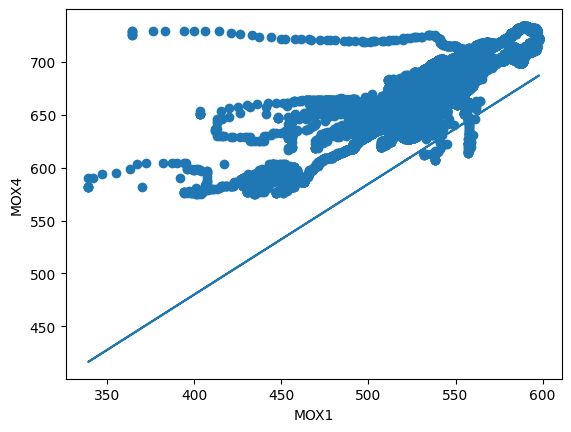

In [25]:
plt.scatter(df['MOX1'],df['MOX3'])
m , b = np.polyfit(df['MOX1'],df['MOX4'],1)      # m --> slope b --> intercept
plt.plot(df['MOX1'],m*df['MOX1']+b)
plt.xlabel("MOX1")
plt.ylabel("MOX4")
plt.show()

c:\Users\ml18\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


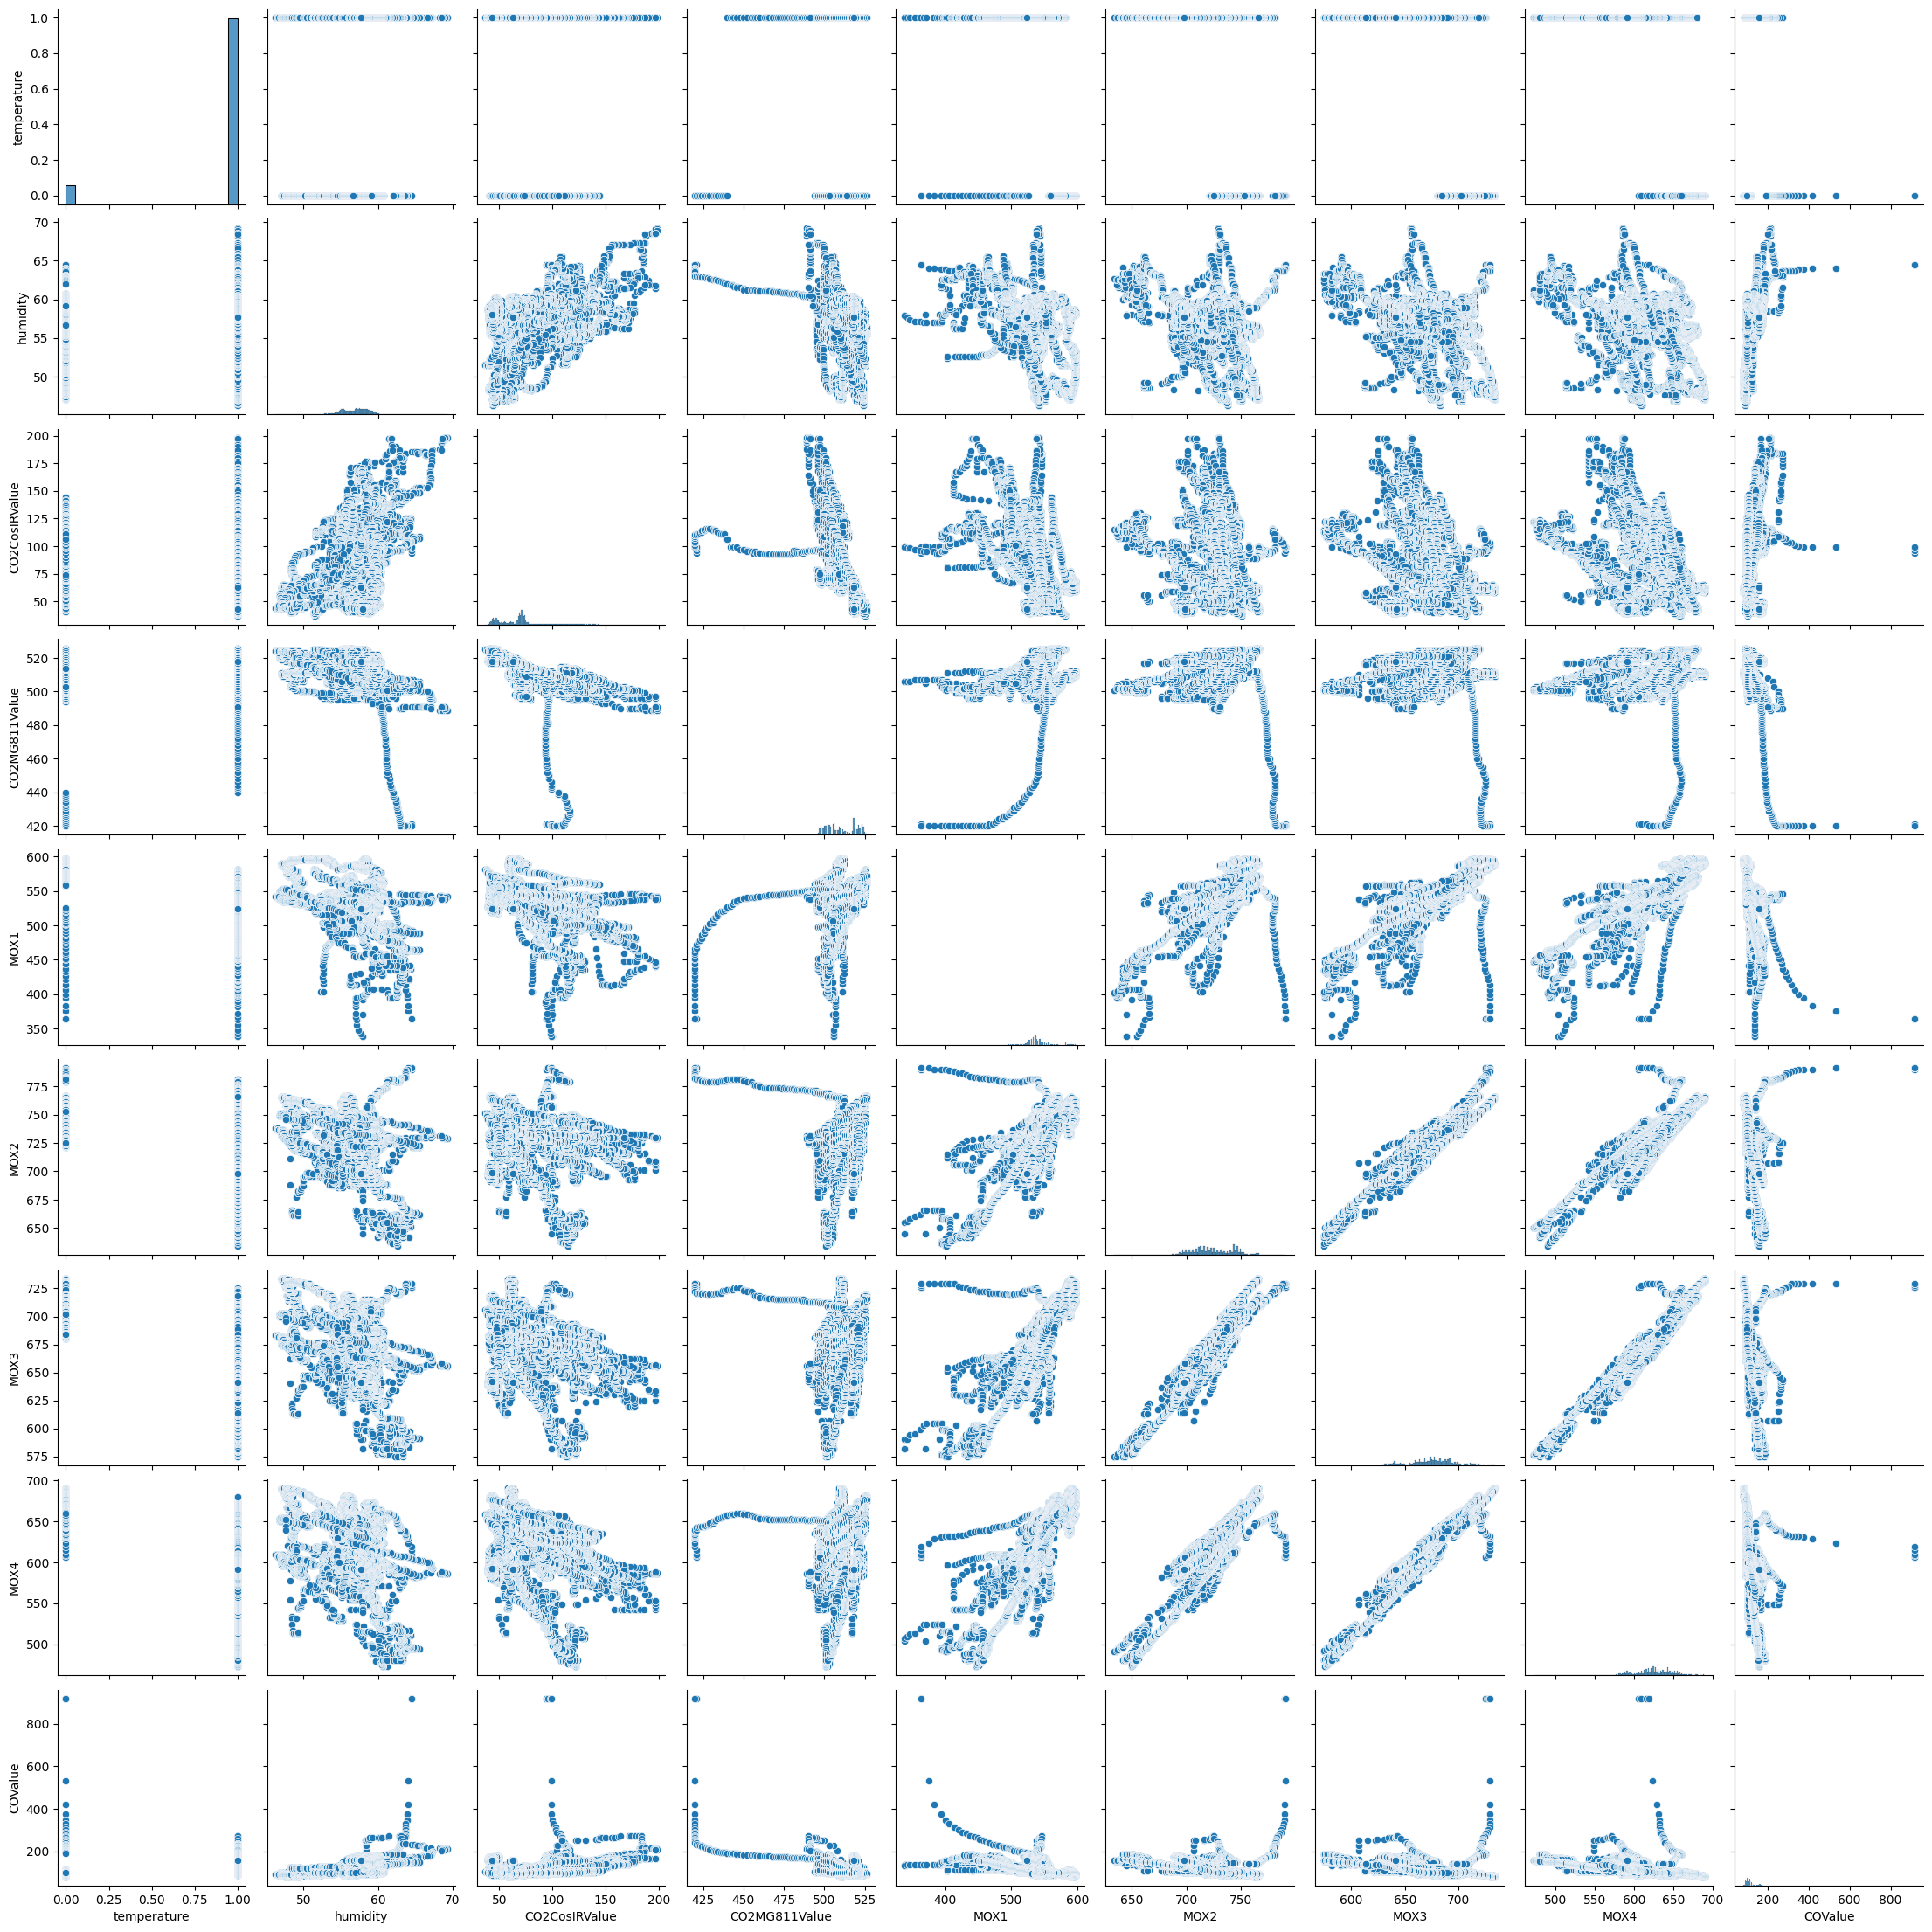

In [28]:
sns.pairplot(df)